In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hand_digit_model/keras/default/1/trained_model.h5


In [3]:
import tensorflow as tf

2025-07-05 13:04:18.751637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751720658.954304      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751720659.014094      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Input
from keras import backend as K

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
num_of_trainImgs = x_train.shape[0] #60000 here
num_of_testImgs = x_test.shape[0] #10000 here
img_width = 28
img_height = 28
 
x_train = x_train.reshape(x_train.shape[0], img_height, img_width, 1)
x_test = x_test.reshape(x_test.shape[0], img_height, img_width, 1)
input_shape = (img_height, img_width, 1)
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [17]:

model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [22]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9945 - loss: 0.0153 - val_accuracy: 0.9923 - val_loss: 0.0310
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9942 - loss: 0.0179 - val_accuracy: 0.9925 - val_loss: 0.0301
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9947 - loss: 0.0146 - val_accuracy: 0.9927 - val_loss: 0.0304
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9947 - loss: 0.0139 - val_accuracy: 0.9930 - val_loss: 0.0287
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9953 - loss: 0.0152 - val_accuracy: 0.9932 - val_loss: 0.0289
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9956 - loss: 0.0137 - val_accuracy: 0.9926 - val_loss: 0.0329
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9953 - loss: 0.0132 - val_accuracy: 0.9926 - val_loss: 0.0301
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9955 - loss: 0.0128 - val_accuracy: 0.

In [23]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.037523381412029266
Test accuracy: 0.9921000003814697


In [24]:
model.save('trained_model.h5')

In [ ]:
import matplotlib.pyplot as plt

def plot_comparison(history1, label1, history2, label2):
    st.subheader("📊 Optimizer Comparison: Accuracy & Loss")
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy
    axs[0].plot(history1.history['accuracy'], label=label1)
    axs[0].plot(history2.history['accuracy'], label=label2)
    axs[0].set_title("Training Accuracy")
    axs[0].legend()

    # Loss
    axs[1].plot(history1.history['loss'], label=label1)
    axs[1].plot(history2.history['loss'], label=label2)
    axs[1].set_title("Training Loss")
    axs[1].legend()

    st.pyplot(fig)


In [25]:
def build_model():
        
    model = Sequential()
    model.add(Input(shape=(28, 28, 1)))
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [34]:
model_adadelta = build_model()  # define your CNN model
model_adadelta.compile(optimizer='Adadelta',
                       loss=tf.keras.losses.CategoricalCrossentropy(),
                       metrics=['accuracy'])
history_adadelta = model_adadelta.fit(x_train, y_train, epochs=10)

model_adam = build_model()  # same model again
model_adam.compile(optimizer='Adam',
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.1958 - loss: 2.2560
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4831 - loss: 2.0062
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5998 - loss: 1.6142
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6667 - loss: 1.2405
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7115 - loss: 1.0039
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7398 - loss: 0.8671
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7607 - loss: 0.7783
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7773 - loss: 0.7218
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7916 - loss: 0.6795
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8015 - loss: 0.6429
Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8831 - loss: 0.3713
Epoch 2/10
1875/1875 ━━━━━━━━━━

In [38]:
import json

with open("history_adam.json", "w") as f:
    json.dump(history_adam.history, f)

# # Load it back
# with open("history_adam.json", "r") as f:
#     loaded_history = json.load(f)

with open("history_adadelta.json", "w") as f:
    json.dump(history_adadelta.history, f)

# # Load it back
# with open("history_adam.json", "r") as f:
#     loaded_history = json.load(f)


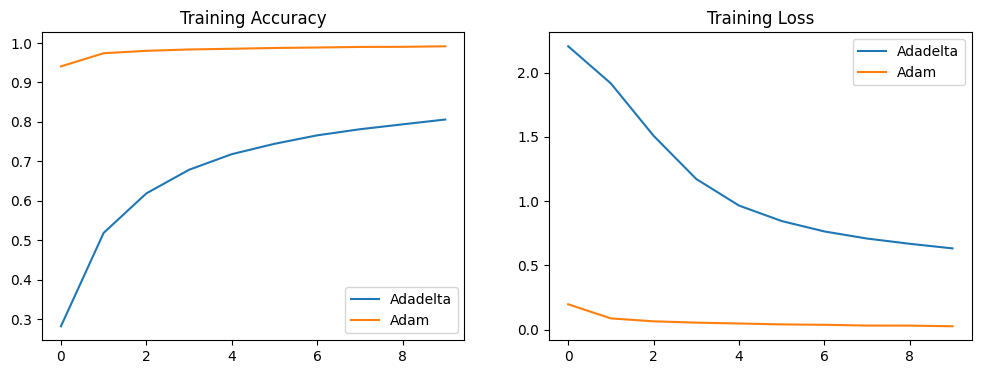

In [40]:
plot_comparison(history_adadelta, "Adadelta", history_adam, "Adam")
